<a href="https://colab.research.google.com/github/saksham1965/data-analyst/blob/main/DNN%20assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn tensorflow


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Load dataset
df = pd.read_csv('AmesHousing.csv')  # Adjust path if needed

# Drop columns with too many missing values or not useful
df = df.drop(columns=['Order', 'PID'], errors='ignore')

# Separate features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit and transform
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert targets to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Linear output for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    verbose=1)


Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 37817688064.0000 - mae: 178056.7031 - val_loss: 38137450496.0000 - val_mae: 179894.9219
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 38012727296.0000 - mae: 179105.7500 - val_loss: 37556957184.0000 - val_mae: 178365.5156
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 37103566848.0000 - mae: 176214.5000 - val_loss: 35743358976.0000 - val_mae: 173517.0312
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 32986593280.0000 - mae: 167333.0156 - val_loss: 32048431104.0000 - val_mae: 163229.1250
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 31038322688.0000 - mae: 158410.0469 - val_loss: 26277728256.0000 - val_mae: 145817.5469
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24781752320.0000 - mae: 138797.3906 - val_loss: 19163486208.0000 - val_mae: 121126.4297
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17181716480.0000 - mae: 112257.2344 - val_loss: 1205304

In [7]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on test data: ${mae:,.2f}")


Mean Absolute Error on test data: $16,700.38


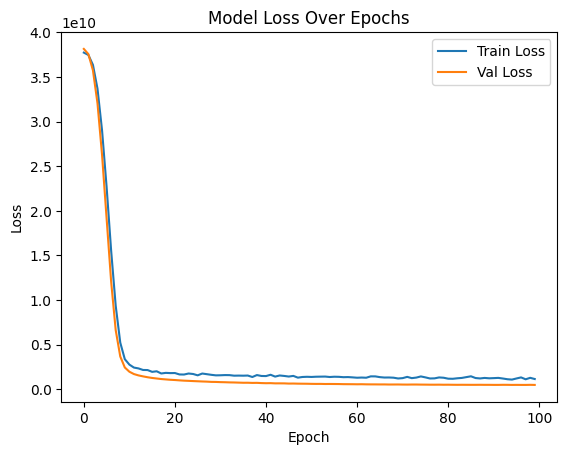

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
